## Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from fbprophet import Prophet

## Read Data

In [2]:
filename = "../data/data.csv"

In [3]:
df = pd.read_csv(filename)

In [4]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

In [5]:
df.head()

,datetime,consumption,temp
0,"12/19/2018, 3:00:02 PM",249,69
1,"12/19/2018, 4:00:03 PM",294,69
2,"12/19/2018, 6:00:02 PM",287,69
3,"12/19/2018, 7:00:02 PM",285,69
4,"12/19/2018, 8:00:02 PM",228,69


### Convert index to datetime

In [6]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

,consumption,temp
datetime,,
2018-12-19 15:00:02,249,69
2018-12-19 16:00:03,294,69
2018-12-19 18:00:02,287,69
2018-12-19 19:00:02,285,69
2018-12-19 20:00:02,228,69


### Verify that no value is null

In [7]:
df.isna().sum()

consumption    0
temp           0
dtype: int64

In [8]:
df['consumption'] = df['consumption'] + 1

In [9]:
min(df.consumption)

1

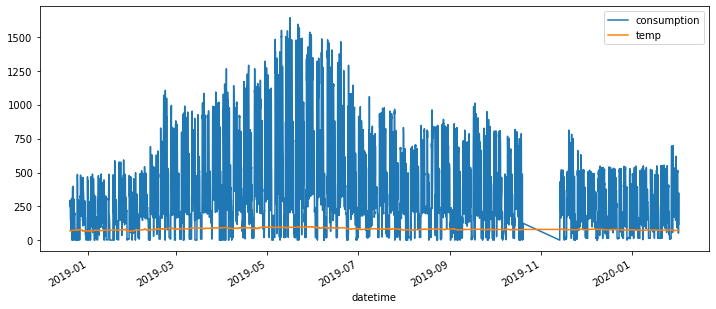

In [10]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [11]:
df.nlargest(10,'consumption')

,consumption,temp
datetime,,
2019-05-16 12:00:02,1643,96
2019-05-16 11:00:01,1620,96
2019-05-21 15:00:02,1594,98
2019-05-21 16:00:02,1583,98
2019-05-22 14:00:02,1568,99
2019-05-22 15:00:02,1568,99
2019-05-22 12:00:01,1554,99
2019-05-22 13:00:02,1551,99
2019-05-10 15:00:02,1549,96


In [12]:
df = df.reset_index()

In [13]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

## Changing dataframe format specific to Prophet Model

In [14]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [15]:
df.count()

ds      9041
y       9041
temp    9041
dtype: int64

In [16]:
df.nlargest(10,'y')

,ds,y,temp
3502,2019-05-16 12:00:02,1643,96
3501,2019-05-16 11:00:01,1620,96
3625,2019-05-21 15:00:02,1594,98
3626,2019-05-21 16:00:02,1583,98
3648,2019-05-22 14:00:02,1568,99
3649,2019-05-22 15:00:02,1568,99
3646,2019-05-22 12:00:01,1554,99
3647,2019-05-22 13:00:02,1551,99
3361,2019-05-10 15:00:02,1549,96
3650,2019-05-22 16:00:01,1548,99


In [17]:
df.y = np.log(df.y)

## Model Fitting

In [18]:
model = Prophet()

In [19]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


## Predictions

In [20]:
prediction=model.predict(df)

In [21]:
org_prediction = prediction.copy()

In [22]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3788,2019-05-28 10:00:02,5.810391,5.616792,8.804854,5.810391,5.810391,1.480200,1.480200,1.480200,0.668521,0.668521,0.668521,0.811680,0.811680,0.811680,0.0,0.0,0.0,7.290592
3789,2019-05-28 11:00:01,5.810187,5.694125,8.892253,5.810187,5.810187,1.477391,1.477391,1.477391,0.696344,0.696344,0.696344,0.781047,0.781047,0.781047,0.0,0.0,0.0,7.287578
3620,2019-05-21 10:00:02,5.806944,5.577356,8.990314,5.806944,5.806944,1.480200,1.480200,1.480200,0.668521,0.668521,0.668521,0.811680,0.811680,0.811680,0.0,0.0,0.0,7.287144
3621,2019-05-21 11:00:02,5.807009,5.694019,8.881333,5.807009,5.807009,1.477366,1.477366,1.477366,0.696327,0.696327,0.696327,0.781038,0.781038,0.781038,0.0,0.0,0.0,7.284375
3452,2019-05-14 10:00:02,5.792400,5.660536,8.804747,5.792400,5.792400,1.480200,1.480200,1.480200,0.668521,0.668521,0.668521,0.811680,0.811680,0.811680,0.0,0.0,0.0,7.272600
3453,2019-05-14 11:00:02,5.792651,5.644693,8.840641,5.792651,5.792651,1.477366,1.477366,1.477366,0.696327,0.696327,0.696327,0.781038,0.781038,0.781038,0.0,0.0,0.0,7.270017
3956,2019-06-04 10:00:02,5.776048,5.655156,8.927317,5.776048,5.776048,1.480200,1.480200,1.480200,0.668521,0.668521,0.668521,0.811680,0.811680,0.811680,0.0,0.0,0.0,7.256248
3957,2019-06-04 11:00:03,5.775843,5.579853,8.788147,5.775843,5.775843,1.477340,1.477340,1.477340,0.696310,0.696310,0.696310,0.781029,0.781029,0.781029,0.0,0.0,0.0,7.253183
3292,2019-05-07 10:00:02,5.750103,5.633246,8.873481,5.750103,5.750103,1.480200,1.480200,1.480200,0.668521,0.668521,0.668521,0.811680,0.811680,0.811680,0.0,0.0,0.0,7.230304
3293,2019-05-07 11:00:02,5.750355,5.731977,8.903318,5.750355,5.750355,1.477366,1.477366,1.477366,0.696327,0.696327,0.696327,0.781038,0.781038,0.781038,0.0,0.0,0.0,7.227721


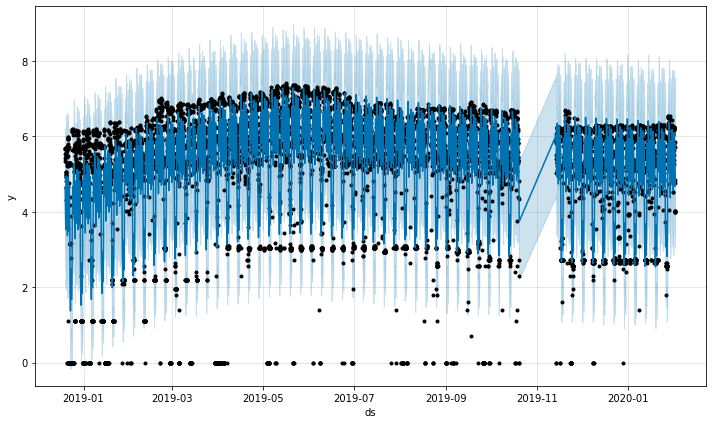

In [23]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

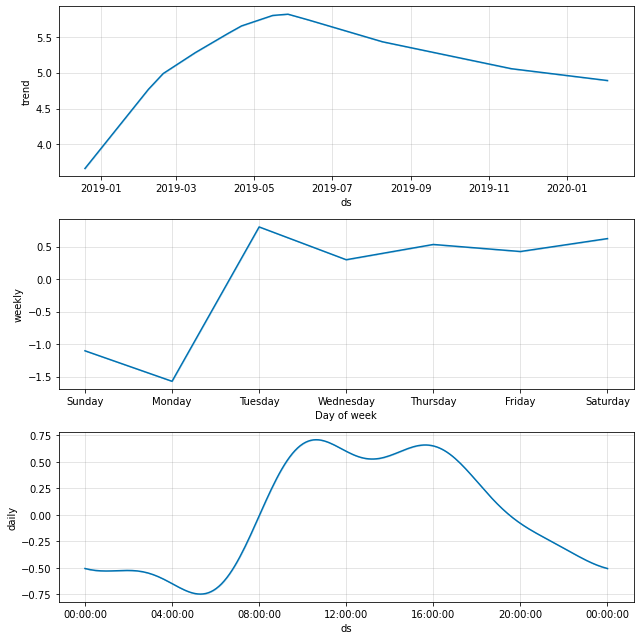

In [24]:
fig = model.plot_components(prediction)

In [25]:
df.head()

,ds,y,temp
0,2018-12-19 15:00:02,5.521461,69
1,2018-12-19 16:00:03,5.686975,69
2,2018-12-19 18:00:02,5.662960,69
3,2018-12-19 19:00:02,5.655992,69
4,2018-12-19 20:00:02,5.433722,69


In [26]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,3.665246,2.955732,6.225203,3.665246,3.665246,0.956806,0.956806,0.956806,0.636608,0.636608,0.636608,0.320197,0.320197,0.320197,0.0,0.0,0.0,4.622052
1,2018-12-19 16:00:03,3.666174,3.059373,6.204281,3.666174,3.666174,0.993852,0.993852,0.993852,0.649889,0.649889,0.649889,0.343963,0.343963,0.343963,0.0,0.0,0.0,4.660026
2,2018-12-19 18:00:02,3.668029,2.810437,5.980589,3.668029,3.668029,0.708943,0.708943,0.708943,0.315274,0.315274,0.315274,0.393668,0.393668,0.393668,0.0,0.0,0.0,4.376972
3,2018-12-19 19:00:02,3.668957,2.537525,5.772838,3.668957,3.668957,0.509064,0.509064,0.509064,0.090277,0.090277,0.090277,0.418788,0.418788,0.418788,0.0,0.0,0.0,4.178021
4,2018-12-19 20:00:02,3.669884,2.558498,5.584425,3.669884,3.669884,0.362200,0.362200,0.362200,-0.081342,-0.081342,-0.081342,0.443542,0.443542,0.443542,0.0,0.0,0.0,4.032084


## Errors

In [27]:
true_val = np.exp(df.y)

In [28]:
pred_val = np.exp(org_prediction['yhat'])

In [29]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

41324.434585763825

In [30]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

139.03428017487846

## Prediction

In [31]:
data = ['2019-02-25 15:00:00']
test = pd.DataFrame(data, columns = ['ds']) 

In [32]:
test.ds

0    2019-02-25 15:00:00
Name: ds, dtype: object

In [33]:
val = model.predict(test)

In [34]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-25 15:00:00,5.067499,4.278215,7.476362,5.067499,5.067499,0.782244,0.782244,0.782244,0.636573,0.636573,0.636573,0.145672,0.145672,0.145672,0.0,0.0,0.0,5.849743


In [35]:
np.exp(val['yhat'])

0    347.145216
Name: yhat, dtype: float64

## Saving Model

In [36]:
type(model)

fbprophet.forecaster.Prophet

In [37]:
pkl_path = "model.pkl"

In [38]:
model.stan_backend.logger = None

In [39]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [40]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)